<a href="https://colab.research.google.com/github/MAKKAJIYASHASREE/AI/blob/main/19K41A05G2_ASSIGNMENT_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


importing libraries

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import xlrd

In [ ]:
book=xlrd.open_workbook(filename='/content/drive/MyDrive/Pds/ slr09.xls')
df=pd.read_excel(book)

*** No CODEPAGE record, no encoding_override: will use 'ascii'


load data

In [ ]:
df.head(34)

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


In [ ]:
X = df['X'].values
y = df['Y'].values

In [ ]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

Data split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [ ]:
X_train

array([[8.2],
       [8.4],
       [6.7],
       [8.5],
       [8.1],
       [7.3],
       [7.8],
       [8.1],
       [8. ],
       [7.1],
       [7.8],
       [7.3],
       [7.8],
       [7.3],
       [8.5],
       [7.2],
       [7.1],
       [7.3],
       [7.3],
       [7.9],
       [7.4],
       [8.2],
       [8.8],
       [7.9],
       [7.5],
       [8. ],
       [7.1],
       [7.4],
       [7.5],
       [7.6]])

In [ ]:
X_test

array([[7. ],
       [7.6],
       [7.7],
       [7.1]])

In [ ]:
y_train

array([[175],
       [ 35],
       [117],
       [ 82],
       [215],
       [ 87],
       [147],
       [ 56],
       [ 81],
       [142],
       [105],
       [ 76],
       [143],
       [121],
       [ 48],
       [133],
       [174],
       [262],
       [217],
       [ 53],
       [171],
       [202],
       [147],
       [155],
       [190],
       [190],
       [182],
       [125],
       [188],
       [157]])

In [ ]:
y_test

array([[199],
       [157],
       [113],
       [210]])

model training

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
m = lm.coef_
c = lm.intercept_,
print("Estimated model slope, m:" , m)
print("Estimated model intercept, c:" , c)

Estimated model slope, m: [[-30.97868174]]
Estimated model intercept, c: (array([377.83911166]),)


model prediction with testing and tarining data

In [ ]:
y_pred_train=lm.predict(X_train)
y_pred_test=lm.predict(X_test)

error metrics calculation for traning data
RMSE,MSE and MAE

In [ ]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('TRAINING Root mean square error', rmse) 
mse = (mean_squared_error(y_train, y_pred_train)) 
print('TRAINING Mean square error', mse) 
mae=mean_absolute_error(y_train, y_pred_train)
print('TRAINING Mean absolute error', mae)

TRAINING Root mean square error 53.65417854583525
TRAINING Mean square error 2878.7708754283676
TRAINING Mean absolute error 46.5692850890857


error metric calculation for testing data mse,mae and rmse

In [ ]:
mse = math.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('TESTING Root mean square error', mse) 
mse = (mean_squared_error(y_test, y_pred_test)) 
print('TESTING Mean square error', mse) 
mae=mean_absolute_error(y_test, y_pred_test)
print('TESTING Mean absolute error', mae)

TESTING Root mean square error 35.585382928993646
TESTING Mean square error 1266.3194782031123
TESTING Mean absolute error 32.75583025501805


deployment

In [ ]:
import pickle
# Save the model
filename = 'model.pkl'
pickle.dump(lm, open(filename, 'wb'))

In [ ]:
model = pickle.load(open('model.pkl', 'rb'))
user_ip=input('enter PH value')
adv=np.array(float(user_ip))
adv=adv.reshape(-1,1)
prediction = model.predict(adv)
result = prediction[0]
print('PH value',float(user_ip))
print('bicarbonates level',result)

enter PH value7.1
PH value 7.1
bicarbonates level [157.89047132]


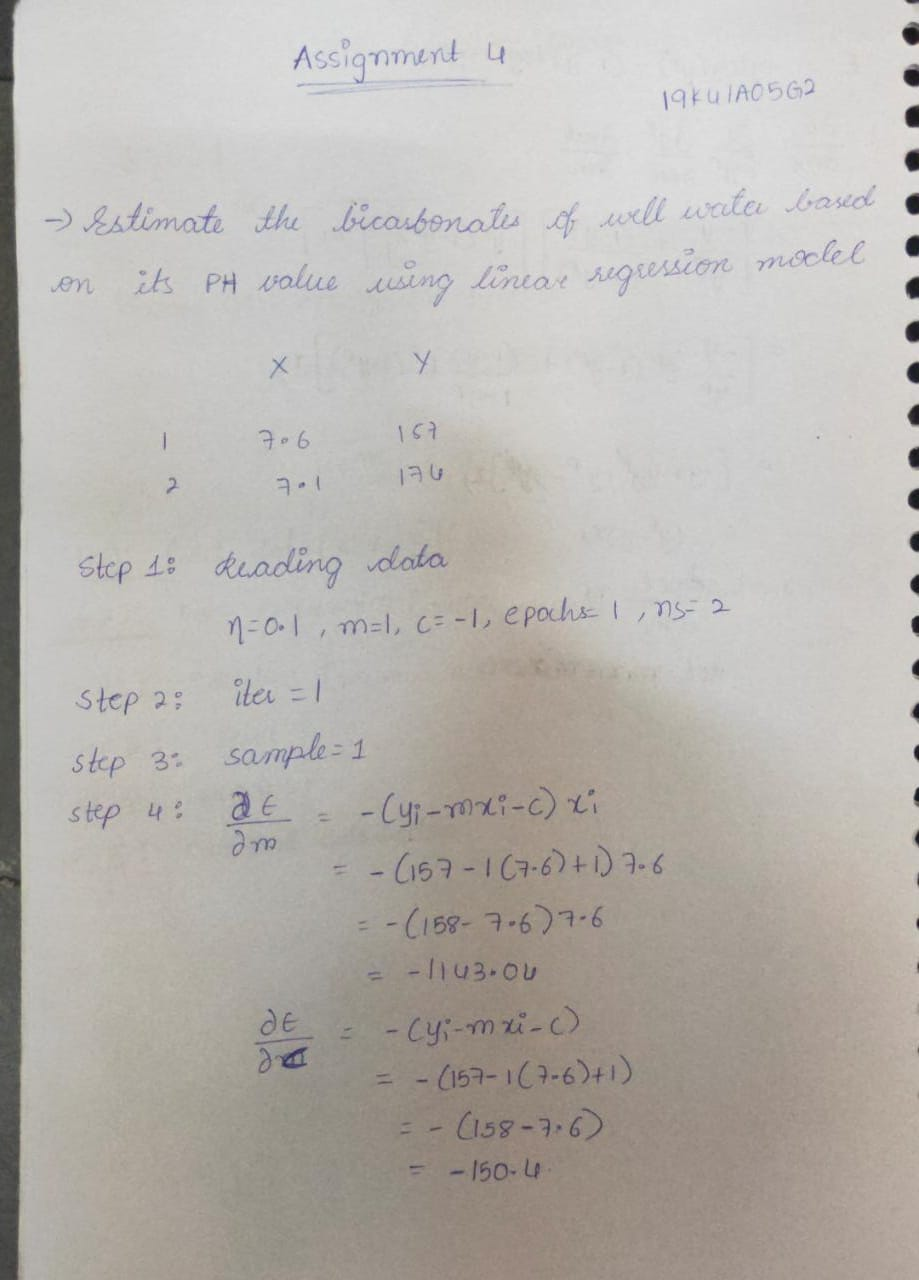

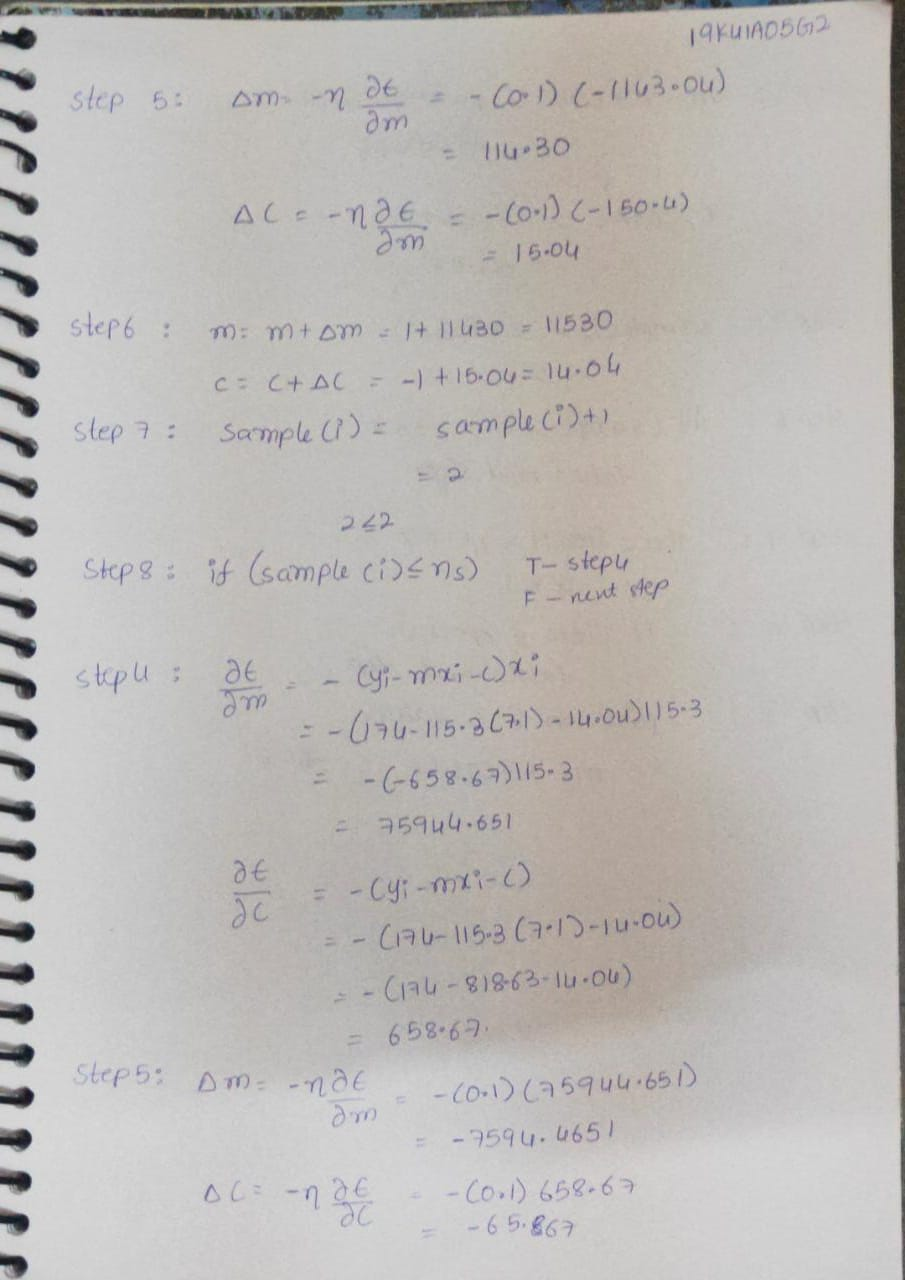

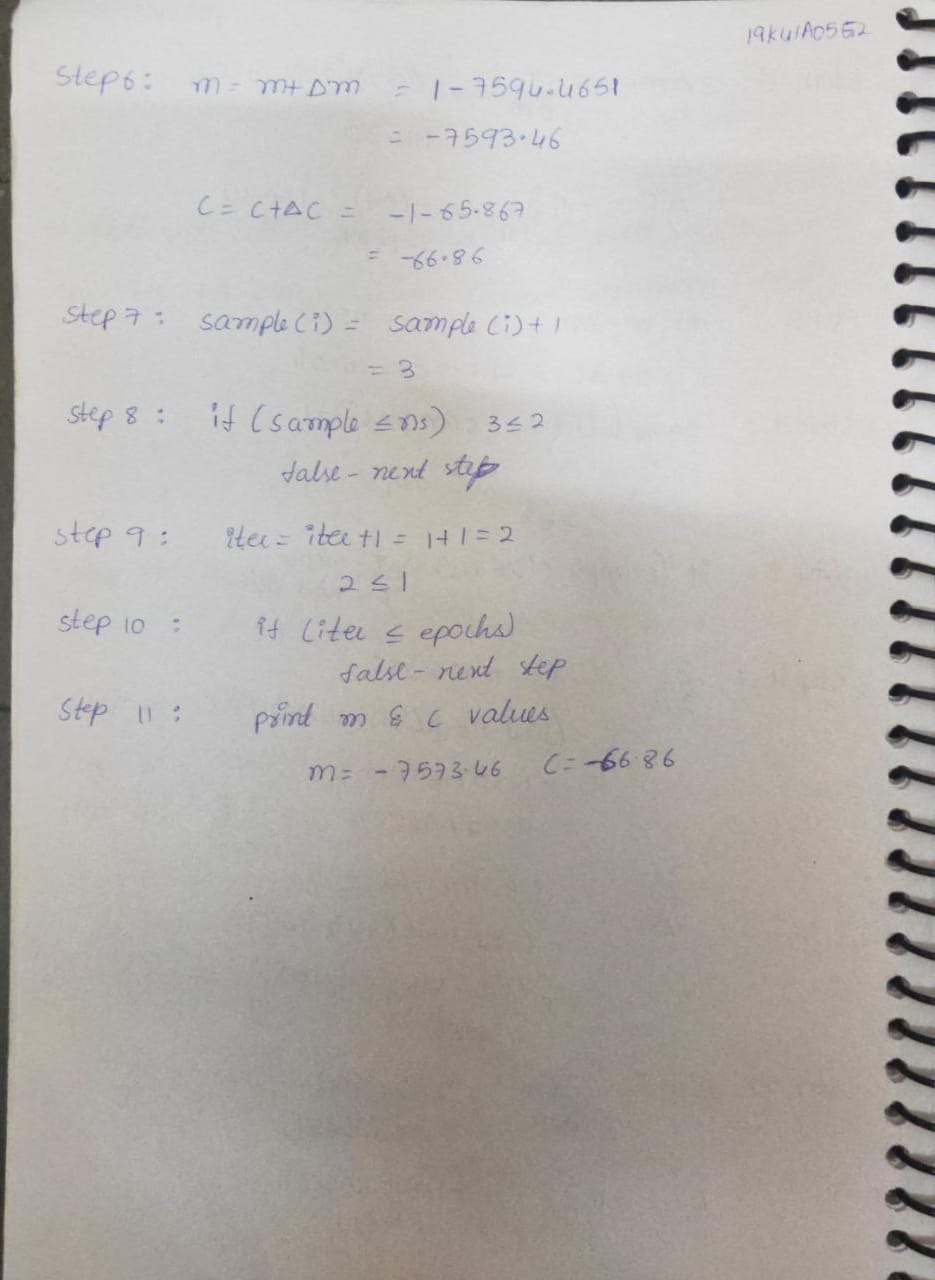